In [50]:
files = [
#     'sub_knn_res50_with_back_0_54.csv',
#         'sub_knn_res50_without_back_0_48.csv',
#         'sub_knn_res50_with_back_all_layers_with_back_0_24.csv',
#         'sub_knn_xception_with_back_0_54.csv',
        'Inception_5_epoch_augmentation_0.6.csv',
#         'Resnet_5_epoch_augmentation_4_epoch_0.57.csv',
        #'sub_knn_densenet121_with_back_0_56.csv',
#         'sub_knn_densenet121_with_back_K5_0_57.csv',
#         'sub_knn_xception_with_back_K5.csv',
        'Inception_6_epoch_augmentation_+rescaling_0.6.csv',
#         'sub_InceptionResNetV2_59.csv',
#         'sub_knn_inception_v3_with_back_K5.csv',
        'Dencenet_5_epoch_augmentation_0.62.csv',
#         'bal_sub_KNN_densenet_K5.csv',
#         'bal_sub_KNN_inception_v3_K5.csv',
#         'bal_sub_KNN_resnet50_K5.csv',
#         'bal_sub_KNN_xception_K5.csv',
        'sub_InceptionResNetV2_64.csv',
        'sub_KNN_xception_K3.csv',
        'sub_KNN_resnet50_K3.csv',
        'sub_KNN_inception_v3_K3.csv',
        'sub_KNN_densenet_K3.csv'
]
scores = [
#         54, 
#           48, 
#           24, 
#           54, 
          60, 
#           57,
         #56,
#          57,
#          55,
         60,
#          59,
#          52,
        62,
#         60,
#         57,
#         57,
#         57, 
        64,
        57,
        57,
        57,
        60
]

In [51]:
len(files) == len(scores)

True

In [52]:
import pandas as pd
from tqdm.auto import tqdm

result = {}

# initial:
df = pd.read_csv(files[0])
df = df.sort_values(by = 'name')
names = list(df.name)
cat = list(df.category)

for n,s in zip(names, cat):
    result[n] = [s for i in range(scores[0])]
    
# additional
for i in range(1,len(files)):
    df = pd.read_csv(files[i])
    df = df.sort_values(by = 'name')
    names = list(df.name)
    cat = list(df.category)

    for n,s in zip(names, cat):
        result[n] = result[n] + [s for j in range(scores[i])]
    

In [53]:
# final prediction

from scipy import stats

pred = [stats.mode(result[k])[0][0] for k in tqdm(result.keys())]

# Submit file
submission = pd.DataFrame({'name':names,'category':pred})
submission.to_csv('final_submission_the_best_more_Clever_rational.csv', index=False)
print("Done!")


Done!


# Similarity analysis

In [44]:
similarity = np.ones((len(files), len(files)))
for i in range(len(files)):
    for j in range(len(files)):
        similarity[i,j] = sum(pd.read_csv(files[i]).category == pd.read_csv(files[j]).category)

[]

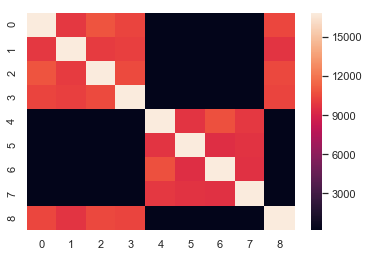

In [45]:
import numpy as np; np.random.seed(0)
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(similarity)
plt.plot()

In [35]:
pd.DataFrame(similarity)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,16858.0,9438.0,192.0,178.0,202.0,207.0,9196.0,186.0,10319.0,9325.0,12681.0,9421.0,206.0,9120.0,11408.0,9048.0,9919.0
1,9438.0,16858.0,181.0,160.0,179.0,199.0,9400.0,172.0,9552.0,9465.0,9231.0,12584.0,187.0,11188.0,8943.0,9127.0,9223.0
2,192.0,181.0,16858.0,9889.0,10890.0,9482.0,173.0,10371.0,190.0,171.0,196.0,176.0,10422.0,163.0,181.0,177.0,185.0
3,178.0,160.0,9889.0,16858.0,10020.0,8804.0,178.0,10160.0,170.0,173.0,182.0,164.0,9779.0,149.0,172.0,173.0,176.0
4,202.0,179.0,10890.0,10020.0,16858.0,9590.0,199.0,10552.0,192.0,193.0,203.0,181.0,10488.0,171.0,190.0,194.0,192.0
5,207.0,199.0,9482.0,8804.0,9590.0,16858.0,186.0,9381.0,202.0,180.0,203.0,201.0,10242.0,197.0,193.0,191.0,199.0
6,9196.0,9400.0,173.0,178.0,199.0,186.0,16858.0,177.0,9500.0,14979.0,9234.0,9471.0,186.0,9168.0,9003.0,12334.0,9260.0
7,186.0,172.0,10371.0,10160.0,10552.0,9381.0,177.0,16858.0,190.0,174.0,183.0,172.0,10385.0,159.0,172.0,179.0,188.0
8,10319.0,9552.0,190.0,170.0,192.0,202.0,9500.0,190.0,16858.0,9782.0,10745.0,9911.0,190.0,9775.0,10493.0,9627.0,14298.0
9,9325.0,9465.0,171.0,173.0,193.0,180.0,14979.0,174.0,9782.0,16858.0,9539.0,9728.0,188.0,9514.0,9346.0,13997.0,9565.0


In [36]:
for i,n in zip(range(len(files)), files):
    print(str(i) + '  '+n)

0  sub_knn_res50_with_back_0_54.csv
1  sub_knn_xception_with_back_0_54.csv
2  Inception_5_epoch_augmentation_0.6.csv
3  Resnet_5_epoch_augmentation_4_epoch_0.57.csv
4  Inception_6_epoch_augmentation_+rescaling_0.6.csv
5  sub_InceptionResNetV2_59.csv
6  sub_knn_inception_v3_with_back_K5.csv
7  Dencenet_5_epoch_augmentation_0.62.csv
8  bal_sub_KNN_densenet_K5.csv
9  bal_sub_KNN_inception_v3_K5.csv
10  bal_sub_KNN_resnet50_K5.csv
11  bal_sub_KNN_xception_K5.csv
12  sub_InceptionResNetV2_64.csv
13  sub_KNN_xception_K3.csv
14  sub_KNN_resnet50_K3.csv
15  sub_KNN_inception_v3_K3.csv
16  sub_KNN_densenet_K3.csv


In [89]:
sum(submission.category == pd.read_csv(files[8]).category)

178